In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: right;"> &#9989; Rupita Tahsin

---
# __Graph Theory I: properties and applications__
<a href="https://openflights.org/data.html"><img src="https://openflights.org/demo/openflights-routedb-2048.png" width="800"/><p style="text-align: right;">
Network formed by flight paths
</p>


# Learning objectives

At the end of the exercise, you should be able to:
- Retrive existing graph data.
- Plot graphs with different layout and node colors.
- Determine three properties of graphs/nodes.
- Detect communities within a graph.
- Build a graph by scraping info from the web.

# Outline

</p>

1. [Review of pre-class assignment](#preclass)
1. [Graph application: community detection](#community)
1. [Building a graph of interconnected web pages](#Web_Scraping)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

In the graph example of section 2.2 with alphabets as the nodes I was striggling to represent the nodes by alphabets instead of numbers. I could not figure out an appropriate syntax to enable changing node names assignment in the DiGraph method. 

Mark came up with a solution to this problem by searching the web and trying to understand the options provided by this method.

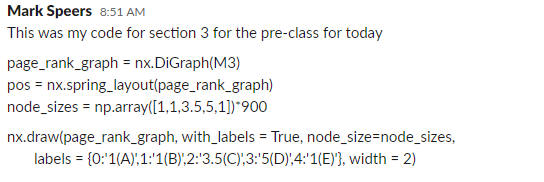

---
<a name="community"></a>
# 2. Graph property and application

## 2.1 Zachary Karate Club network and community detection

*This tutorial is adapted from [here](https://deepnote.com/publish/c38c10bf-3fab-4e97-8a66-9c7c0eb972ad).*

We are going to start by playing with the Zachary Karate Club network (ZKC). This is the most famous network, from [this paper](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf) in 1977, and is an example in basically every network theory paper. 

In this graph, the nodes are members of a karate club; edges are included between two member nodes if they interact outside of the karate club. 
The story goes that two members, John A "Officer" (Node 34 in the figure below) and Mr Hi (Node 1 in the figure below), had a falling out causing the club to split into two factions. 

<img src="https://i.ibb.co/jT5qKvR/ZKC-2.jpg" border="0">

The idea behind __community detection__ in network analysis is to predict which nodes belong to which communities, in whatever sense that is well defined. 
In this particular example, we would like to use the ZKC to predict who will end up joining either the John A faction or the Mr Hi faction.

**Note that the indices in python are 0 and 33 for Mr Hi and John A, respectively.**

## 2.2 Getting the graph data from `networkx` 

&#9989; <font color=blue>**DO THIS:**</font> Run the following to import the ZKC graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

#import the ZKC graph:
ZKC = nx.karate_club_graph()

#keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33
type(ZKC)

networkx.classes.graph.Graph

&#9989; <font color=blue>**DO THIS:**</font> Check out the [documentation](https://networkx.org/documentation/stable/reference/classes/graph.html) on the `Graph` object. Print out the nodes and edges in `ZKC`.

In [18]:
# put your codes here

import numpy as np

print("The nodes of the graph are",ZKC.nodes)

print("The edges of the graph are",ZKC.edges)

The nodes of the graph are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
The edges of the graph are [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


We can see a list of nodes or edges, but this is clearly not useful for understanding what's going on.

&#9989; <font color=blue>**DO THIS:**</font> We can also encode the information of a graph in an _adjacency matrix_, which has a 1 in entry $(i,j)$ if there is an edge between node $i$ and node $j$, and 0 otherwise:

- Figure out how to use the `nx.convert_matrix.to_numpy_matrix` function to convert `ZKC` into an adjacency matrix called `A`.
- Print out the shape of `A`.

In [19]:
# put your codes here
#Adjacency Matrix is A
A=nx.convert_matrix.to_numpy_matrix(ZKC)
print(A.shape)
print(A)


(34, 34)
[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


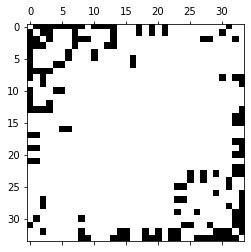

In [26]:
# The spy function lets us see which entries in a matrix are non-zero

import matplotlib.pyplot as plt

plt.spy(A)
plt.show()

## 2.3 Plotting the graph

Since just seeing the list of edges and nodes isn't particularly useful, let's find some better ways to visualize. Luckily, networkx interfaces nicely with matplotlib to draw things for us. 

You can explore the [networkx documentation](https://networkx.org/documentation/stable/) to find a lot of useful functionalities of `networkx`.

In [27]:
#!pip install decorator==4.3

Defaulting to user installation because normal site-packages is not writeable


&#9989; <font color=blue>**DO THIS:**</font> Use the `draw` function to plot `ZKC`.

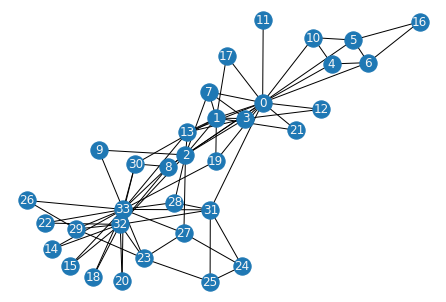

In [28]:
# Here is the simplest drawing tool 
nx.draw(ZKC, with_labels=True, font_color="whitesmoke")

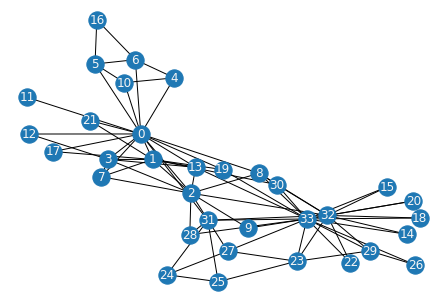

In [29]:
# Run again
nx.draw(ZKC, with_labels=True, font_color="whitesmoke")

Note that if you rerun the above cell, the nodes will be in a different place every time.  Two reasons for this:
- Networks are all about relationships, not about geometry.  Just because I draw a node in a different location, the graph doesn't change. 
- This code uses what's called the default, spring layout, which has randomness built in when deciding where to draw, hence the different locations every time. 

&#9989; <font color=blue>**DO THIS:**</font> We can also put in a bit more control by keeping track of the node drawing positions as a list `node_pos` with a random seed specified.

In [30]:
node_pos = nx.random_layout(ZKC, seed=20220215) 
node_pos[0]

array([0.17277788, 0.469815  ], dtype=float32)

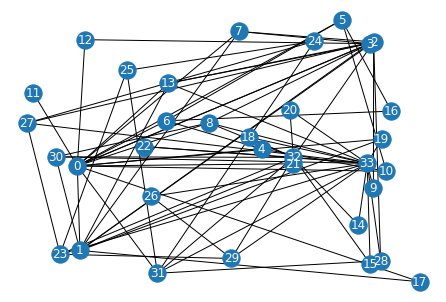

In [31]:
nx.draw(ZKC, pos=node_pos, with_labels=True, font_color="whitesmoke")

&#9989; **<font color=blue>DO THIS:</font>** Run the following to highlight `Mr_Hi` and 'John_A'.

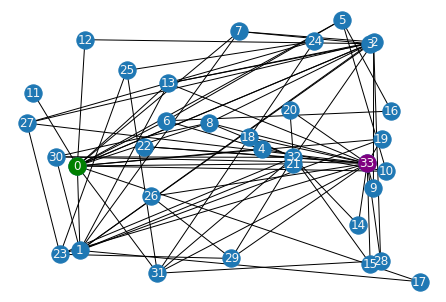

In [33]:
#Use the networkx draw function to easily visualise the graph
# we pass the node_pos to tell it where we want to 
nx.draw(ZKC, node_pos, with_labels=True, font_color="whitesmoke")

#let's highlight Mr Hi (green) and John A (purple)
nx.draw_networkx_nodes(ZKC, node_pos, nodelist=[Mr_Hi], node_color='green', alpha=1)
nx.draw_networkx_nodes(ZKC, node_pos, nodelist=[John_A], node_color='purple', alpha=1)

# Note that rerunning this cell without re-runing the cell above 
# will give the same drawing every time. 

`random_layout` is __almost never__ what you want to use to visualize your network....

&#9989; **<font color=blue>DO THIS:</font>** Try one other layout among [these options](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) and plot the graph. Put the codes below.

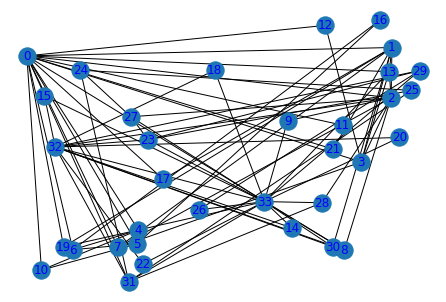

In [39]:
# put you code here

node_pos = nx.random_layout(ZKC, seed=9112091) 
node_pos[10]
nx.draw(ZKC, pos=node_pos, with_labels=True, font_color="blue")


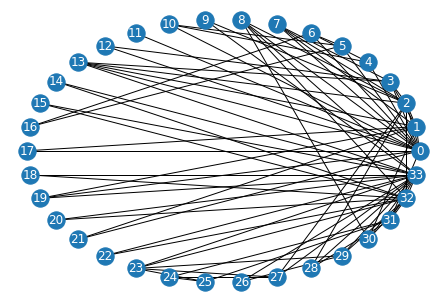

In [41]:
# Trying out Circular layout

node_pos = nx.circular_layout(ZKC) 
node_pos[0]
nx.draw(ZKC, pos=node_pos, with_labels=True, font_color="white")


## 2.4 Graph properties



Prior zooming into a graph to look at details, it is helpful to know the general properties of the graph you are working with. Three among the important ones:

- Degree of a node: the number of edges connecting to the node in question. Find this with the `degree` function of the `Graph` object.
- Distance between two nodes: The number of edges of the _shortest path_ between the two nodes. Find this with the `nx.shortest_path_length`.
- Eccentricity of a node: The maximum distance between the node in question to other nodes. Find this with `nx.eccentricity`.

&#9989; **<font color=blue>DO THIS:</font>** For `Mr_Hi` and `John_A`, print out the following:

- Their degrees.
- Distance between them.
- Their eccentricities.

In [57]:
# put your code here

print("The total number of edges connected to the Mr. Hi node is",ZKC.degree(Mr_Hi))
print("The total number of edges connected to the John A node is",ZKC.degree(John_A))
print("The distance between the two nodes is",nx.shortest_path_length(ZKC,Mr_Hi,John_A))
print("The maximum distance from others to the Mr. Hi node is",nx.eccentricity(ZKC,Mr_Hi))
print("The maximum distance from others to the JOhn A node is",nx.eccentricity(ZKC,John_A))

The total number of edges connected to the Mr. Hi node is 16
The total number of edges connected to the John A node is 17
The distance between the two nodes is 2
The maximum distance from others to the Mr. Hi node is 3
The maximum distance from others to the JOhn A node is 4


&#9989; **<font color=red>QUESTION:</font>** Discss with your groupmates. What do the above three properties tell you about the graph, say if the graph represent a network of friends? 

<font size=+3>&#9998;</font> Put your answer to the above question here

-The degree of the node indicates number of directly connected friends of the individual person(a node) in the group
The number seems close to 16 for both of the nodes in question here indicating they are almost equally connected in the group as they are connected to only half of the total 34 people.

-The shortest path length would indicate the two closest connected friends in the peer group

-The eccentricity of a person(node here) indicates how distantly that person is connected to the peer group. Say if its eccentricity is 4 it means that there is at least one person in the group to whom this individual is not directly connected and connected by a 4th level connection( like a friend of a friend of a friend of a friend)

&#9989; **<font color=blue>DO THIS:</font>** Write codes to calculate the average number of connections in this graph and print it out.

In [65]:
# put your code here
connections=[]
for i in range (0,34):
    connections.append(ZKC.degree(i))

print(connections)

print("The average number of connections in the peer group is",np.mean(connections))

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
The average number of connections in the peer group is 4.588235294117647


## 2.5 Community Detection

Now we can finally try to predict the community structure of the John A/Mr Hi split. 

A network has [community structure](https://en.wikipedia.org/wiki/Community_structure) if the nodes can be grouped into (possibly overlapping) sets which are densely connected internally (i.e. as close as possible to being a complete graph or *clique*). Different algorithms use different mathematical measurements for measuring optimal community structure.  [Many](https://networkx.org/documentation/stable/reference/algorithms/community.html?highlight=community#module-networkx.algorithms.community) of these algorithms are  available in networkx already. 

&#9989; **<font color=blue>DO THIS:</font>** Run the following to find out what `greedy_modularity_communities` do. Discuss with your groupmates on how you can use this find how many communities there are.

In [66]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
help(greedy_modularity_communities)

Help on function greedy_modularity_communities in module networkx.algorithms.community.modularity_max:

greedy_modularity_communities(G, weight=None)
    Find communities in graph using Clauset-Newman-Moore greedy modularity
    maximization. This method currently supports the Graph class and does not
    consider edge weights.
    
    Greedy modularity maximization begins with each node in its own community
    and joins the pair of communities that most increases modularity until no
    such pair exists.
    
    Parameters
    ----------
    G : NetworkX graph
    
    Returns
    -------
    Yields sets of nodes, one for each community.
    
    Examples
    --------
    >>> from networkx.algorithms.community import greedy_modularity_communities
    >>> G = nx.karate_club_graph()
    >>> c = list(greedy_modularity_communities(G))
    >>> sorted(c[0])
    [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
    
    References
    ----------
    .. [1] M. E. J Newman

&#9989; **<font color=blue>DO THIS:</font>** Write python code that will:

- Use `greedy_modularity_communities` to get a list of communities and call this list `C`.
- Print out the number of communities in the `ZKC` graph.
- Assign the members in each community to a list called `comminity_0`, `community_1` and so on.
- Print out the members of each community.

In [74]:
# put your code here
C=list(greedy_modularity_communities(ZKC))
print("The list is",C)

community_0=C[0]
community_1=C[1]
community_2=C[2]

print("First community",community_0)
print("Second community",community_1)
print("Third community",community_2)

The list is [frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 4, 5, 6, 10, 11, 16, 19})]
First community frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})
Second community frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
Third community frozenset({0, 4, 5, 6, 10, 11, 16, 19})


&#9989; **<font color=blue>DO THIS:</font>** Let's plot the graph with different commminitues with different colors. In this graph, the communities are colored differently but the code is incomplete.

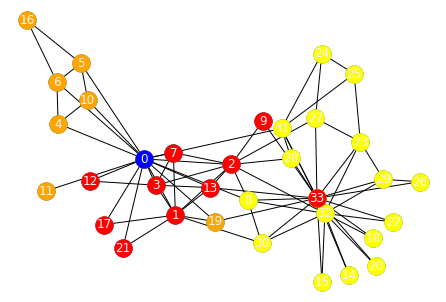

In [90]:
# put your codes here

node_pos = nx.spring_layout(ZKC) 

# Draw everything 1st
nx.draw(ZKC,node_pos, with_labels=True, font_color="whitesmoke")

# Override the figure by drawing each computed community in a seperate colour
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=community_0, node_color='yellow')
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=community_1, node_color='red')
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=community_2, node_color='orange')
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=[Mr_Hi], node_color='blue',alpha=1)
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=[John_A], node_color='red',alpha=1)

###### HELP!! color other communities! #######


plt.show()

In this particular example, we ended up with three communities, but we know there are only 2 in the end: one with `John_A` and the other with `Mr_Hi`. 

&#9989; **<font color=blue>DO THIS:</font>** Visually we see that one group went with `John_A`, so we can combine the other two to see our prediction that way. Write code that combine `community_1` and `community_2` (Hint: these are just lists) and draw the graph again. Make sure you use the `node_pos` object from before to make sure the location of the nodes are the same.

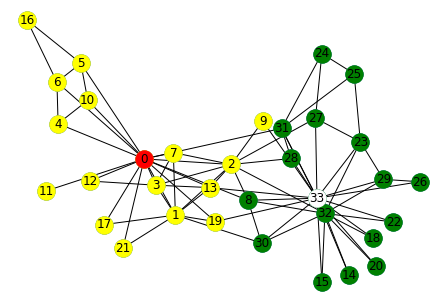

In [91]:
# put your codes here

#ALl the yellow nodes went with JOhn are from community 0. 
community_hi=set(community_1).union(set(community_2))

nx.draw(ZKC,node_pos, with_labels=True, font_color="black")

# Override the figure by drawing each computed community in a seperate colour

nx.draw_networkx_nodes(ZKC,node_pos, nodelist=community_0, node_color='green')
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=community_hi, node_color='yellow')
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=[Mr_Hi], node_color='red',alpha=1)
nx.draw_networkx_nodes(ZKC,node_pos, nodelist=[John_A], node_color='white',alpha=1)
plt.show()


----
<a name="Web_Scraping"></a>
# 3. Building a graph of interconnected websites

## 3.1 Problem Description
We would like to generate a graph of websites by starting on one site (e.g. msu.edu) and crawl from there with a web scraper (spider). Nodes are the website URLs and the edges are the links between the websites. We would then like to plot the __adjacency list__, i.e. a list of sites that are linked to each other.

For this task, we have found some codes that are useful from [this tutorial](http://www.netinstructions.com/how-to-make-a-web-crawler-in-under-50-lines-of-python-code/). Run the following block quickly and focus on the `spider` function in the next code block.

In [92]:
%matplotlib inline 

from urllib import parse
from urllib.request import urlopen  
from urllib.request import urlretrieve
from html.parser import HTMLParser  

class LinkParser(HTMLParser):
    """Parse links of sites
    
    Inherited from: HTMLParser
    """

    def handle_starttag(self, tag, attrs):
        """
        Inherted from HTMLparse but modified. This will look for the begining
          of a link. Links normally look like:
          <a href="www.someurl.com"></a>
           
        Parameters:
          tag (str): name of the tag converted to lower case
          attrs (dict): a list of (name, value) pairs containing the 
            attributes found inside the tag’s <> brackets
        """
        
        if tag == 'a':
            for (key, value) in attrs:
                if key == 'href':
                    # grab the new URL and add the base URL to it
                    newUrl = parse.urljoin(self.baseUrl, value)
                    # add to a list of links
                    self.links = self.links + [newUrl]

    def getLinks(self, url):
        """
        A new function not in HTMLParser that we are creating to get links that
          our spider() function will call.
          
        Parameters:
          url (str): the url from the spider function
          
        Return:
          htmlString (str): HTML file in string
          self.links (list): a list of URLs
        """
        
        self.links = []
        self.baseUrl = url        
        response = urlopen(url)
        
        # Make sure that we are looking at HTML and not other things
        if 'text/html' in response.getheader('Content-Type'):
            htmlBytes  = response.read()
            htmlString = htmlBytes.decode("utf-8")
            self.feed(htmlString)
            return htmlString,self.links #htmlString, self.links
        if 'text/plain' in response.getheader('Content-Type'):
            return url,[]
        else:
            return "",[]


&#9989; <font color=blue>**DO THIS:**</font> Go through the following codes and discuss with your groupmate what this is doing.

In [93]:
def spider(url, maxPages):  
    """
    This is our spider for crawl around websites.
    
    Parameter:
      url (str): url to crawl
      maxPages (int): the number of pages to search through before giving up
      
    Return:
    """
    
    pagesToVisit = [url]
    numberVisited = 0
    foundWord = False

    while numberVisited < maxPages and pagesToVisit != []:
        numberVisited = numberVisited +1
        # Start from the beginning of our collection of pages to visit:
        url = pagesToVisit[0]
        pagesToVisit = pagesToVisit[1:]

        try:
            print(numberVisited, "Visiting:", url)
            parser = LinkParser()
            
            # Get the web page and links to the page
            data, links = parser.getLinks(url)
            
            # Add more links to vist
            pagesToVisit = pagesToVisit + links
        except:
            print(" **Failed to parse page!**")

&#9989; <font color=blue>**DO THIS:**</font> Run the spider function.

In [94]:
spider('https://msu.edu/', 10)

1 Visiting: https://msu.edu/
2 Visiting: https://msu.edu/#global-header
3 Visiting: https://msu.edu/#main-content
4 Visiting: https://msu.edu/#global-footer
5 Visiting: https://msu.edu/#maincontent
6 Visiting: https://msu.edu/
7 Visiting: https://msu.edu/students
8 Visiting: https://msu.edu/alumni
9 Visiting: https://msu.edu/faculty-staff
10 Visiting: https://admissions.msu.edu/apply


## 3.2 Modify `spider` to build a graph

&#9989; <font color=blue>**DO THIS:**</font> Add code to the above `spider` function (call this `spider2`) to generate an adjacency list of websites visited by the web scraper.  Nodes are the website URLs and the edges are the links between the websites. [Hint]: Create a new `networkX` graph object in the function and go from there.

In [146]:
# put your spider2 code below

import networkx as nx
def spider2(url, maxPages):  
    """
    This is our spider for crawl around websites.
    
    Parameter:
      url (str): url to crawl
      maxPages (int): the number of pages to search through before giving up
      
    Return:
    """
    
    pagesToVisit = [url]
    numberVisited = 0
    foundWord = False
    G = nx.Graph() # <--- NEW CODE

    while numberVisited < maxPages and pagesToVisit != []:
        numberVisited = numberVisited +1
        # Start from the beginning of our collection of pages to visit:
        url = pagesToVisit[0]
        pagesToVisit = pagesToVisit[1:]

        try:
            print(numberVisited, "Visiting:", url)
            parser = LinkParser()
            
            # Get the web page and links to the page
            data, links = parser.getLinks(url)
            
            for link in links:        # <--- NEW CODE
                G.add_edge(url,link)      # <--- add an edge to the graph that connects the current webpage to the webpages that the current webpage links to 

            # Add more links to vist
            pagesToVisit = pagesToVisit + links
        except:
            print(" **Failed to parse page!**")
            
    return  G # <--- Return the graph objective

In [147]:
G = spider2('https://msu.edu/', 10)

1 Visiting: https://msu.edu/
2 Visiting: https://msu.edu/#global-header
3 Visiting: https://msu.edu/#main-content
4 Visiting: https://msu.edu/#global-footer
5 Visiting: https://msu.edu/#maincontent
6 Visiting: https://msu.edu/
7 Visiting: https://msu.edu/students
8 Visiting: https://msu.edu/alumni
9 Visiting: https://msu.edu/faculty-staff
10 Visiting: https://admissions.msu.edu/apply


&#9989; <font color=blue>**DO THIS:**</font> Plot the graph.

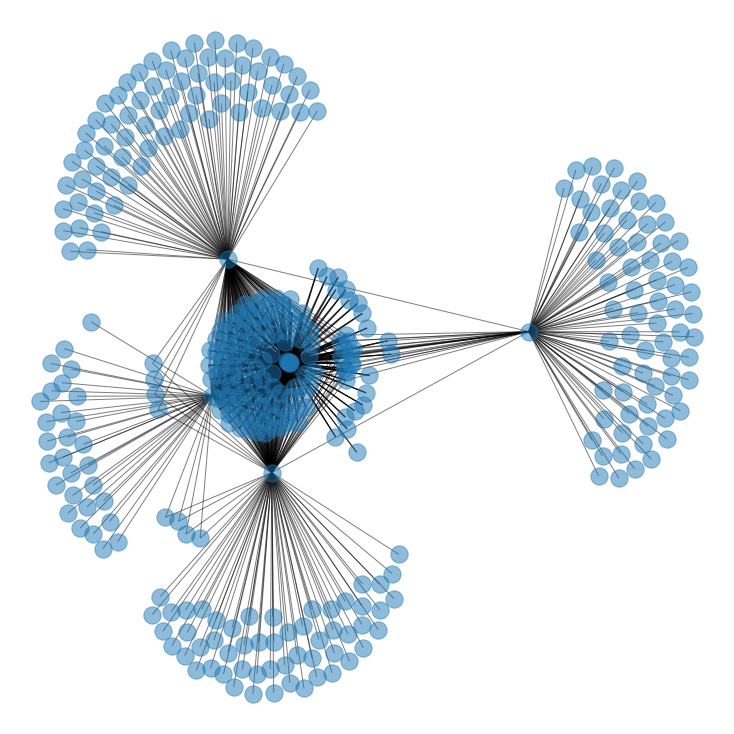

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, alpha=0.5)
plt.show()

&#9989; <font color=blue>**DO THIS:**</font> Get page rank and the sites with the highest and the lowest ranks.

In [149]:
# pagerank
PR = nx.pagerank(G)

# find max and min PR
inverse = [(value, key) for key, value in PR.items()]

print('max PR =', max(inverse))
print('min PR =', min(inverse))

max PR = (0.08121114679669408, 'https://msu.edu/faculty-staff')
min PR = (0.0007045115064608351, 'http://careers.msu.edu/')


Looks like the most directed to link from the msu website is the faculty and staff page, and the least directed one is the careers page.

Cool illustration from networkX!

---------
# Congratulations, you're done with your in-class assignment!

__Please make sure you upload your file by 10pm the same day of the class!__ Late exercise will receive <=80% of the grade.

&#169; Copyright 2021,  Michigan State University Board of Trustees